----
----

# other notebook links:
* [Simple Linear Regression](https://www.kaggle.com/mukeshmanral/linear-regression-basic)
* [Multiple Linear Regression](https://www.kaggle.com/mukeshmanral/multiple-linear-regression-basic)
* [Polynomial Regression](https://www.kaggle.com/mukeshmanral/polynomial-regression-basic)
* [Advanced Linear Regression](https://www.kaggle.com/mukeshmanral/advance-linear-regression-basic-gridsearchcv-hpt)






* [Feature Engineering 1](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-1-basic)
* [Feature Engineering 2](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-2-basic)
* [Feature Engineering 3](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-3-basic)
* [Feature Engineering 4](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-4-basic)

----
----

**I am tring to apply some Advance Linear Regression like:**
* `Lasso Regression` or `L1 Regularization`
* `Ridge Regression` or `L2 Regularization` regularization parameter `⍺`alpha => controls complexity of the model
* `ElasticNet Regression` combination of L1 and L2 => if `l1_ratio=0` then L2 Reg is activated else for `l1_ratio=1` then L1 Reg => `Values between 0 and 1 give us a combination of both L1 and L2 regularization`
* `Polynomial Regression`

**also I will apply `GridSearchCV` and `Hyperparameter Tuning`** here we have `⍺` and `l1_ratio`

**Points on `⍺`**: <br>
* Higher values of ⍺ force coefficients to move towards zero and increases the restriction on the model. This decreases training performance, but also increases the generalizability of the model. Setting ⍺ too high could lead to a model that is too simple and underfits the data
* With lower values of ⍺ the coefficients are less restricted. When ⍺ is very small the model becomes more similar to linear regression above and we risk overfitting

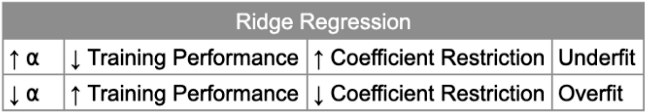

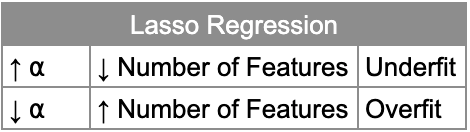

You can find out when and where to use Lasso and Ridge in MODEL heading which is below there in this notebook

# Problem
`Car Price Prediction`

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/car-price/CarPrice_Assignment.csv


In [2]:
# importing necessary libraries at one place

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# mean_squared_error module for applying RMSE
from sklearn.metrics import mean_squared_error as mse

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# Data Understanding and Exploration

In [3]:
data = pd.read_csv('/kaggle/input/car-price/CarPrice_Assignment.csv')

In [4]:
data.shape

(205, 26)

In [5]:
# first 5 
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# summary of the dataset: 205 rows, 26 columns, no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

### Understanding Unique value distribution
Checking various attributes in a feature and its contribution in dataset

In [7]:
for i in data.columns:
    #print(i,'\n',data[i].value_counts(),'\n','***'*20,'\n')
    print(f'Column name: [{i}]\n{data[i].value_counts()}\n','***'*20,'\n')

Column name: [car_ID]
1      1
142    1
132    1
133    1
134    1
      ..
72     1
73     1
74     1
75     1
205    1
Name: car_ID, Length: 205, dtype: int64
 ************************************************************ 

Column name: [symboling]
 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64
 ************************************************************ 

Column name: [CarName]
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: CarName, Length: 147, dtype: int64
 ************************************************************ 

Column name: [fueltype]
gas       185
diesel     20
Name: fueltype, dtype: int64
 ************************************************************ 

Column name: [aspiration]
std      168
turb

`Observation` <br>
* `symboling`: shows -2 (least risky) to +3 most risky but most of the cars are 0,1,2.
* `aspiration`: (internal combustion) engine property showing whether oxygen intake is through standard(atmospheric pressure) or through turbocharging(pressurised oxygen intake)
* `drivewheel`: frontwheel, rarewheel or four-wheel drive <br>
try to observe other by yourself, or ping me

Ploting distribution plot for `wheelbase`: this is distance between centre of front and rarewheels

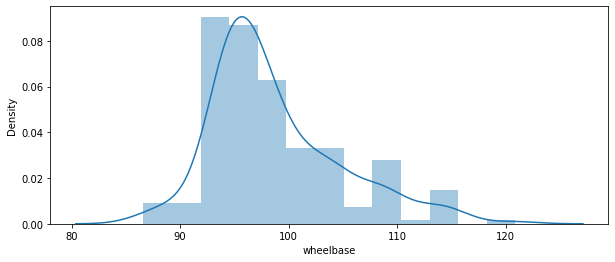

In [8]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.wheelbase)

plt.show()

Ploting distribution plot for `curbweight`: this is weight of car without occupants or baggage

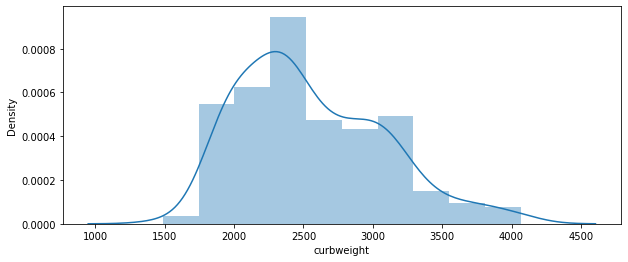

In [9]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.curbweight)

plt.show()

Ploting distribution plot for `stroke`: this is volume of engine (distance traveled by piston in each cycle)

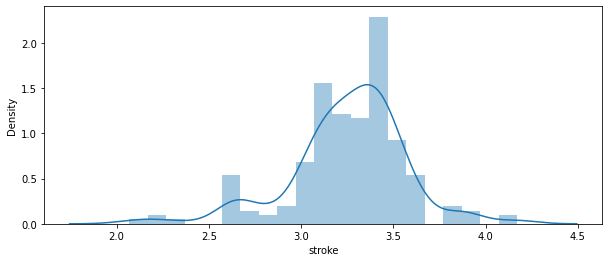

In [10]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.stroke)

plt.show()

Ploting distribution plot for `compressionratio`: this is ratio of volume of compression chamber at largest capacity to least capacity

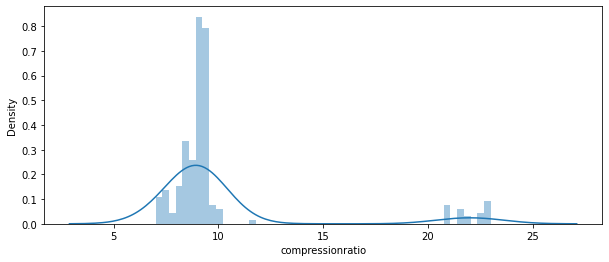

In [11]:
# ploting wheetbase distribution
plt.figure(figsize=(10,4))
sns.distplot(data.compressionratio)

plt.show()

Ploting distribution plot for target variable `price`: this is price of car

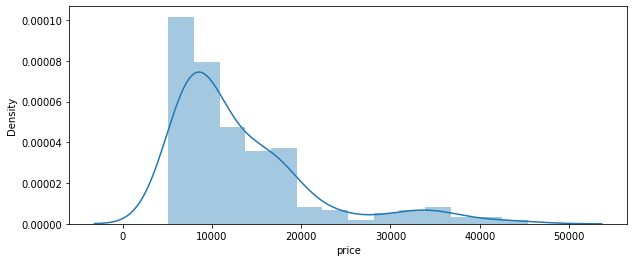

In [12]:
# ploting price distribution
plt.figure(figsize=(10,4))
sns.distplot(data.price)

plt.show()

# Data Exploration
To perform Linear Regression(numeric) target variable should be linearly related to at least one another numeric variable
* Let's see whether that's true in this case

`Steps`:<br>
1. subseting list of all (independent)numeric variables and then 
2. making a pairwise plot

In [13]:
### 1.
# all numeric (float and int) variables in dataset
data_only_numeric_cols = data.select_dtypes(include=['float64','int64'])

#head
data_only_numeric_cols.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


In [14]:
data_only_numeric_cols.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

Variable `symboling` is numeric(int) treating it as categorical, since it has only 6 discrete values
* Dont want `car_ID`.. Why?? Wait

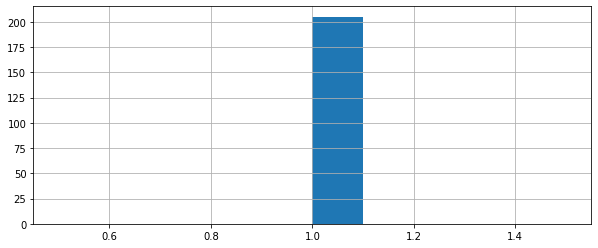

In [15]:
plt.figure(figsize=(10,4))
data_only_numeric_cols.car_ID.value_counts().hist()
plt.show()

Try to observe histogram of `car_ID` column, if you can find anything inform me then
* Most of the time ID columns are of note use, but one example where I found ID column to be usefull is `Big Mart Sales`. 

In [16]:
# dropping symboling and car_ID 
data_only_numeric_cols.drop(['car_ID','symboling'],axis=1,inplace=True)

data_only_numeric_cols.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


**Ploting a `Pairwise Scatter plot` and observe Linear Relationships**

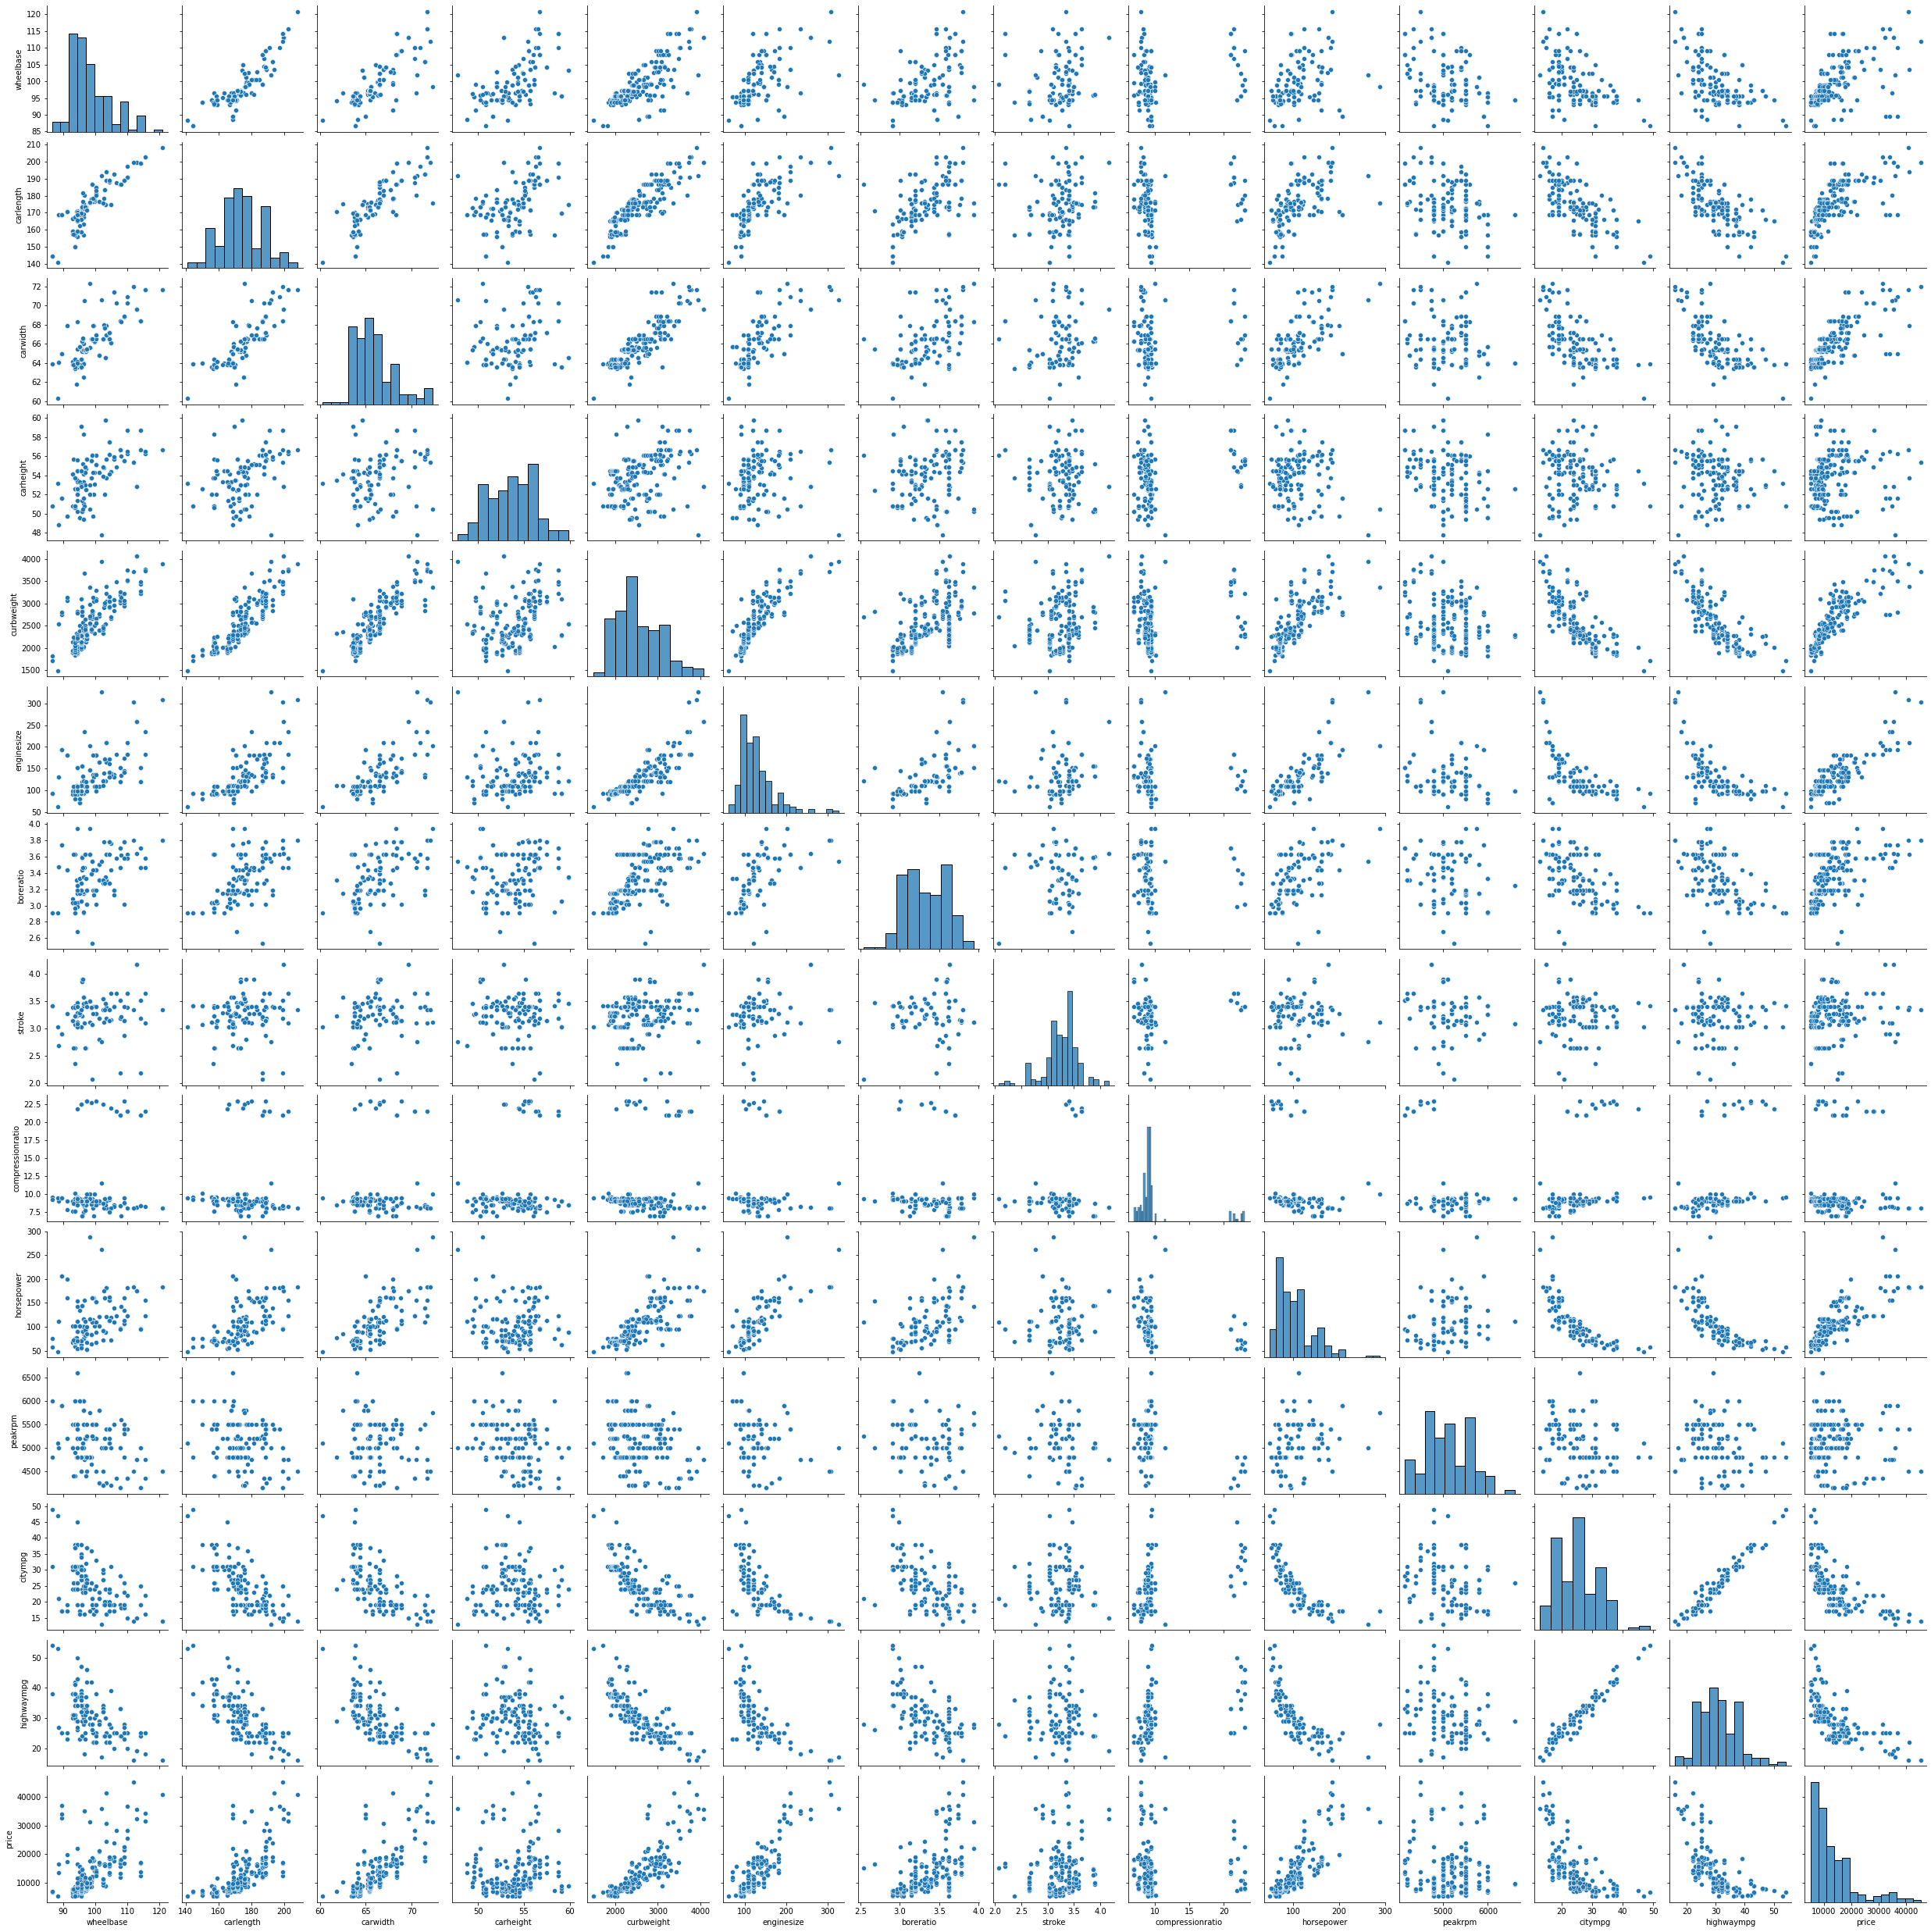

In [17]:
# paiwise scatter plot for all variables in data_only_numeric_cols

sns.pairplot(data_only_numeric_cols)


Quite hard to interpret and I can rather plot correlations between variables also a heatmap is pretty useful to visualise multiple correlations in one plot

In [18]:
# correlation matrix
corr = data_only_numeric_cols.corr()

#print cor
corr

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
wheelbase,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984
horsepower,0.353294,0.552623,0.640732,-0.108802,0.750739,0.809769,0.573677,0.080940,-0.204326,1.000000,0.131073,-0.801456,-0.770544,0.808139


**Plotting `Correlations on a Heatmap`**

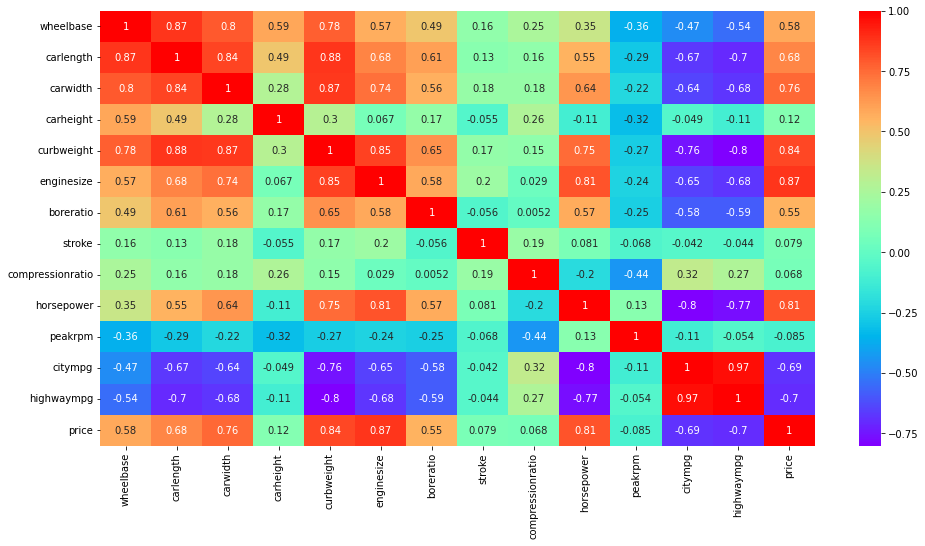

In [19]:
plt.figure(figsize=(16,8))
sns.heatmap(corr,cmap='rainbow',annot=True)

plt.show()

`Observations:`
1. `Corr Among Independent Variables:`
    * Most of independent variables are highly correlated (look at top-left part of matrix): `wheelbase`, `carlength`, `carbwidht`, `enginesize` etc are all measures of 'size/weight' and are positively correlated
2. `Corr price with independent variables:`
    * Price is `highly(positively) correlated` with `wheelbase`, `carlength`, `carwidth`, `curbweight`, `enginesize`, `horsepower`(notice how all of these variables represent size/weight/engine power of car)
    * Price is `negatively correlated` to `citympg` and `highwaympg` (-0.70 approximately)
        * This suggest that cars having high mileage may fall in 'economy' cars category and are priced lower(think Maruti Alto/Swift type of cars, which are designed to be affordable for middle class, who value mileage more than horsepower/size of car)
        

While building model I'll have to pay attention to `Multicollinearity`(especially Linear Models, such as Linear Regression and Logistic Regression as they suffers more from multicollinearity)

# Data Cleaning
There are no missing values in the dataset
Variables are in correct format except `symboling` 
* `symboling` should rather be a Categorical Variable (so that dummy variable are created for that)

In [20]:
data.symboling.dtype

dtype('int64')

In [21]:
data.symboling.value_counts()

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

In [22]:
# converting symboling to categorical datatype by changing its datatype to object
data['symboling'] = data.symboling.astype('object')
data.symboling.dtype

dtype('O')

**Extracting `company_name` from `CarName` column**

In [23]:
# CarName: first few entries (upto 30)

data.CarName[:30]

0            alfa-romero giulia
1           alfa-romero stelvio
2      alfa-romero Quadrifoglio
3                   audi 100 ls
4                    audi 100ls
5                      audi fox
6                    audi 100ls
7                     audi 5000
8                     audi 4000
9           audi 5000s (diesel)
10                     bmw 320i
11                     bmw 320i
12                       bmw x1
13                       bmw x3
14                       bmw z4
15                       bmw x4
16                       bmw x5
17                       bmw x3
18             chevrolet impala
19        chevrolet monte carlo
20          chevrolet vega 2300
21                dodge rampage
22          dodge challenger se
23                   dodge d200
24            dodge monaco (sw)
25           dodge colt hardtop
26              dodge colt (sw)
27         dodge coronet custom
28            dodge dart custom
29    dodge coronet custom (sw)
Name: CarName, dtype: object

Notice it that carname occurs before a space e.g. bmw 320i, chevrolet impala etc

I am tring to simply extract string before a space, I can do it in multiple ways 

**`Extracting Cars_name`**

In [24]:
# Method 1: str.split() by space
cars_company_name = data.CarName.apply(lambda x:x.split(' ')[0])

# first 30 cars name
print(cars_company_name[:30])

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object


In [25]:
# Method 2: Use regular expressions
import re

# regex: any alphanumeric sequence before a space, may contain a hyphen
p = re.compile(r'\w+-?\w+')

#apply above regex pattern to CarName
cars_company_name = data.CarName.apply(lambda x:re.findall(p,x)[0])

# first 30 cars name
print(cars_company_name[:30])

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object


**`Creating new column to store Compnay Name`**

In [26]:
# value_counts for each compnay
data['cars_company_name'] = cars_company_name
data['cars_company_name'].value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
volkswagen      9
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
isuzu           4
porsche         4
alfa-romero     3
chevrolet       3
jaguar          3
vw              2
maxda           2
renault         2
toyouta         1
vokswagen       1
Nissan          1
mercury         1
porcshce        1
Name: cars_company_name, dtype: int64

Try to Observe you will find some car-company names are misspelled like
* `vw and vokswagen` should be `volkswagen`
* `porcshce` should be `porsche` 
* `toyouta` should be `toyota`
* `Nissan` should be `nissan`
* `maxda` should be `mazda` so oon

**`Solving Above Data Quality Issue`**

Trying to Replacing misspelled car_company names using loc

In [27]:
# volkswagen
data.loc[(data.cars_company_name=='vw')|(data.cars_company_name=='vokswagen'),'cars_company_name']='volkswagen'

# porsche
data.loc[(data.cars_company_name=='porcshce'),'cars_company_name']='porsche'

# toyota
data.loc[(data.cars_company_name=='toyouta'),'cars_company_name']='toyota'

# nissan
data.loc[(data.cars_company_name=='Nissan'),'cars_company_name']='nissan'

# mazda
data.loc[(data.cars_company_name=='maxda'),'cars_company_name']='mazda'

In [28]:
# value_counts for each compnay
data['cars_company_name'].value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: cars_company_name, dtype: int64

Now `cars_company_name` variable looks cool to me

**`Let's now drop CarName variable`**

In [29]:
# drop CarName variable
data.drop('CarName',axis=1,inplace=True)

In [30]:
# data statistical discription
data.describe()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Data Preparation
Now preparing data and build the model

Spliting into X and y

In [31]:
# defining X
X = data.drop('price',axis=1)

# sefining y
y = data.price

In [32]:
X.head()

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,cars_company_name
0,1,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
1,2,3,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,alfa-romero
2,3,1,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,alfa-romero
3,4,2,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,audi
4,5,2,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,audi


In [33]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

# Creating dummy variables for categorical variables

In [34]:
# subset all categorical variables
data_only_cat = X.select_dtypes(include='object')

data_only_cat.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,cars_company_name
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [35]:
# convert into dummies
data_only_cat_dummies = pd.get_dummies(data_only_cat,drop_first=True)

data_only_cat_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,...,cars_company_name_nissan,cars_company_name_peugeot,cars_company_name_plymouth,cars_company_name_porsche,cars_company_name_renault,cars_company_name_saab,cars_company_name_subaru,cars_company_name_toyota,cars_company_name_volkswagen,cars_company_name_volvo
0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# droping categorical variables from X

X.drop(list(data_only_cat),axis=1,inplace=True)

In [37]:
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22


In [38]:
# concat dummy variables with X

X = pd.concat([X,data_only_cat_dummies],axis=1)

In [39]:
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cars_company_name_nissan,cars_company_name_peugeot,cars_company_name_plymouth,cars_company_name_porsche,cars_company_name_renault,cars_company_name_saab,cars_company_name_subaru,cars_company_name_toyota,cars_company_name_volkswagen,cars_company_name_volvo
0,1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
1,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,...,0,0,0,0,0,0,0,0,0,0
2,3,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,...,0,0,0,0,0,0,0,0,0,0
3,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,...,0,0,0,0,0,0,0,0,0,0
4,5,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling 

In [40]:
from sklearn.preprocessing import scale

In [41]:
X = pd.DataFrame(scale(X),columns=X.columns)
X.head()

,car_ID,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,...,cars_company_name_nissan,cars_company_name_peugeot,cars_company_name_plymouth,cars_company_name_porsche,cars_company_name_renault,cars_company_name_saab,cars_company_name_subaru,cars_company_name_toyota,cars_company_name_volkswagen,cars_company_name_volvo
0,-1.723622,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
1,-1.706724,-1.690772,-0.426521,-0.844782,-2.020417,-0.014566,0.074449,0.519071,-1.839377,-0.288349,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
2,-1.689826,-0.708596,-0.231513,-0.190566,-0.543527,0.514882,0.604046,-2.404880,0.685946,-0.288349,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
3,-1.672928,0.173698,0.207256,0.136542,0.235942,-0.420797,-0.431076,-0.517266,0.462183,-0.035973,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812
4,-1.656029,0.107110,0.207256,0.230001,0.235942,0.516807,0.218885,-0.517266,0.462183,-0.540725,...,-0.310253,-0.23812,-0.188025,-0.158114,-0.099258,-0.17364,-0.249351,-0.430083,-0.249351,-0.23812


## Splitting into train test

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
# split into train and test with test_size=30% and random_state=108
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=108)

In [44]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((143, 69), (62, 69), (143,), (62,))

# Model Building
Before going into `Ridge, Lasso and ElasticNet Regression`, one must understand `Bias and Variance` along with [Linear Regression](https://www.kaggle.com/mukeshmanral/linear-regression-basic)

But I will try to sum up everything for now:

----
* In `Linear Regression` we have Cost fucntion(ERROR) or Sum of Residual .ie `(y-yhat)^2`

----
* In `Ridge Regression` we update Cost Function(ERROR) or Sum of Residual .ie `(y-yhat)^2 + lambda * (slope)^2` => `lambda` can take 0 to 1/0, cant be -ve value, => Usually lambda value is taken small as if lambda value will increse `slope` will try to become || to x-axis somehow but will never be 0
    * Used to Reduce Overfitting Problem which can be understood as if you learn some topic in class say 100%(training set) and in class_test you only wrote say 50% of what you learned(test_set), now i can tell you you are Overfitting
    * It basically penalize features having higher `slope`, as a reult Error reduces
    * for say more then one feature values of slope will be added and remainig formula remains the same i.e (slope_1^2 + slope_2^2)

----
* In `Lasso Regression` we update Cost Function(ERROR) or Sum of Residual .ie `(y-yhat)^2 + lambda * |slope|` => magnitude of slope not square fo slope
    * it helps in reducing Overfitting fore sure
    * Also helps in `Feature Selection`
        * Feature having less slope value will be removed, that means those removed feature were not important for predicting best fit line
    * here slope moves toward 0 constantly and at some point becomes 0, so in the process feature are selected, => in case of Ridge slope only srinks but never becom 0
    * `Good choice when we have a large number of features but expect only a few to be important`

-----
* `Elastic-Net Regression` is a linear regression model that `combines penalties of Lasso and Ridge`
    * `l1_ratio` parameter is used to control combination of L1 and L2 regularization
        * `l1_ratio = 0` we have L2 regularization (Ridge)
        * `l1_ratio = 1` we have L1 regularization (Lasso)
        * `Values between 0 and 1 give a combination of both L1 and L2 regularization`

# Ridge Regression (L2 Regularization)
**`Cross Validation and Hyperparameter Tuning`**

In [45]:
# list of alpha to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 
                    10.0, 20, 50, 100, 500, 1000 ]}

#initialising Ridge() function
ridge = Ridge()
# defining cross validation folds as 5
folds = 5

In [46]:
# Defining GridSearchCV
grid_cv_model = GridSearchCV(estimator=ridge,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)

# fiting GridSearchCV() with X_train and y_train
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.8s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [47]:
# Saving GridSearchCV results into a dataframe 
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# filter cv_results with all param_alpha less than or equal to 200
cv_results = cv_results[cv_results['param_alpha']<=200]

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.006237,0.001851,0.003858,0.000355,0.0001,{'alpha': 0.0001},-2186.835291,-2670.320508,-2357.761171,-3685.889007,...,-2719.532107,519.889569,27,-877.868785,-881.392182,-967.391224,-955.301631,-855.981598,-907.587084,44.912558
1,0.005206,0.000076,0.003653,0.000066,0.001,{'alpha': 0.001},-2191.251081,-2627.322278,-2337.838222,-3630.933940,...,-2694.091654,502.397712,26,-877.979742,-880.128928,-967.824109,-954.464601,-853.668030,-906.813082,45.521017
2,0.005697,0.000556,0.003867,0.000113,0.01,{'alpha': 0.01},-2210.526075,-2339.833000,-2186.994845,-3275.580980,...,-2519.574643,403.545633,24,-879.039049,-875.021473,-971.503706,-950.915881,-849.462103,-905.188442,47.303223
3,0.005270,0.000247,0.003663,0.000064,0.05,{'alpha': 0.05},-2164.526074,-2064.161496,-1879.700004,-2854.727041,...,-2278.569904,338.491377,23,-895.112874,-896.117603,-984.215037,-953.751470,-872.823302,-920.404057,41.658841
4,0.005183,0.000123,0.003718,0.000227,0.1,{'alpha': 0.1},-2086.978942,-2040.778033,-1738.374625,-2732.280464,...,-2182.044197,330.283228,22,-904.406433,-912.992346,-996.149181,-956.832157,-891.283525,-932.332728,38.760101


`Note`:<br> 
Training results depend on the way train data is splitted in cross validation 

Each time I run, data is splitted randomly and hence can observe minor differences in your answer

**`plotting mean train and test scores with alpha`**

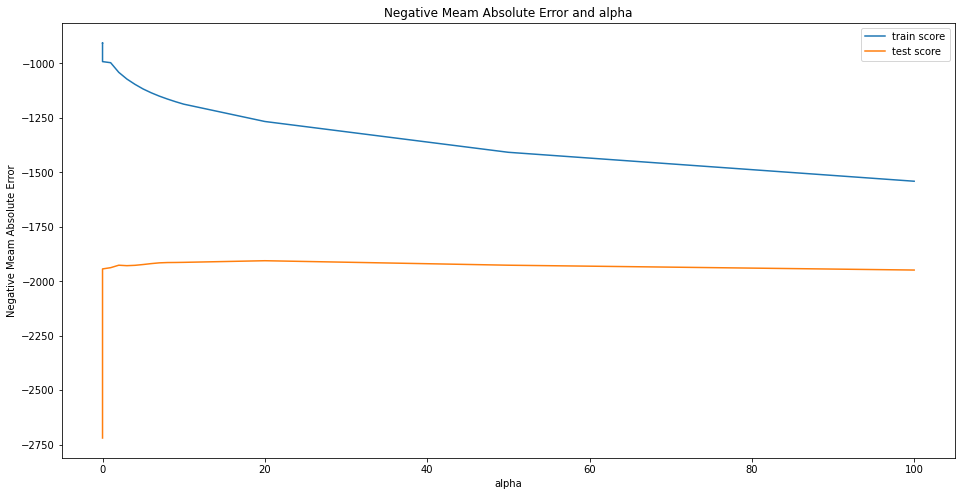

In [48]:
# changing datatype of 'param_alpha' into int
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper right')

plt.show()

In [49]:
# checking best alpha from model_cv

grid_cv_model.best_params_

{'alpha': 20}

Observe that test and train scores start to become parallel to each other after apha crosses 20 

* So lets check our ridge model on alpha 20

In [50]:
#seting alpha as 20
alpha = 20 

# Initialising Ridge() with above alpha
ridge =Ridge(alpha=alpha)

#fitting model
ridge.fit(X_train,y_train)

#printing ridge coeficients
ridge.coef_

array([-5.73105227e+02,  6.89532248e+02,  2.78163595e+02,  8.70522150e+02,
        3.30961135e+01,  1.07240359e+03,  1.37563734e+03,  9.40704272e+01,
       -2.37931489e+02,  5.37817048e+01,  1.06993966e+03,  1.89264544e+02,
       -1.82311174e+02, -1.50728935e+02, -1.02562094e+02,  2.57796560e+02,
        1.40312546e+02, -2.86221989e+02,  1.07473151e+01, -1.73768766e+02,
        1.46252289e+02,  8.86595362e+01,  1.34044023e+02, -3.55689909e+02,
       -1.82159232e+02, -5.18521432e+02, -2.62194971e+02,  1.62333042e+02,
        8.31608459e+02, -1.49878717e+01, -2.29894019e+02,  1.86855419e+02,
        7.15781868e+01,  1.18900865e+02,  1.09008726e+02, -4.63107856e+02,
       -6.11747309e+02, -1.97301390e+01,  3.04858252e+02, -1.55206392e-28,
        1.09008726e+02, -3.38905596e+01, -9.76994743e+01,  1.73768766e+02,
       -1.55206392e-28,  2.81911693e+02, -1.02299066e+02, -1.55206392e-28,
        2.54984974e+02,  1.11525408e+03,  1.14103894e+03, -9.62154385e+01,
       -3.58302460e+02, -

# Lasso
**`Cross Validation and Hyperparameter Tuning`**

In [51]:
# Initialising Lasso()
lasso = Lasso()

#usig same attributes used for Ridge tuning except estimator here would be lasso
grid_cv_model = GridSearchCV(estimator=lasso,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
#fiting model_cv
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.0s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [52]:
# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012850,0.001854,0.002322,0.000142,0.0001,{'alpha': 0.0001},-2269.219983,-2174.303765,-2030.461294,-2839.955003,...,-2371.506234,288.000139,25,-890.228144,-895.868096,-973.220671,-955.308359,-870.439741,-917.013002,39.898473
1,0.011887,0.000606,0.002253,0.000083,0.001,{'alpha': 0.001},-2269.173966,-2174.679684,-2030.237618,-2840.346361,...,-2371.585963,288.120479,26,-890.233359,-895.885069,-973.227474,-955.305027,-870.452116,-917.020609,39.894362
2,0.012513,0.001410,0.002337,0.000116,0.01,{'alpha': 0.01},-2268.709503,-2178.438856,-2028.003454,-2844.252428,...,-2372.381310,289.330653,27,-890.285238,-896.054746,-973.295417,-955.271913,-870.575873,-917.096637,39.853352
3,0.011816,0.000620,0.002237,0.000081,0.05,{'alpha': 0.05},-2266.541375,-2195.146288,-2018.103525,-2837.751681,...,-2371.127030,287.105881,24,-890.509304,-896.806968,-973.599133,-955.151852,-871.125760,-917.438603,39.678773
4,0.011865,0.000579,0.002246,0.000054,0.1,{'alpha': 0.1},-2263.390884,-2191.820607,-2005.415686,-2820.472685,...,-2362.731700,284.647828,23,-890.838413,-897.771778,-974.011450,-955.209476,-871.881485,-917.942520,39.485849


**`plotting mean train and test scores with alpha`**

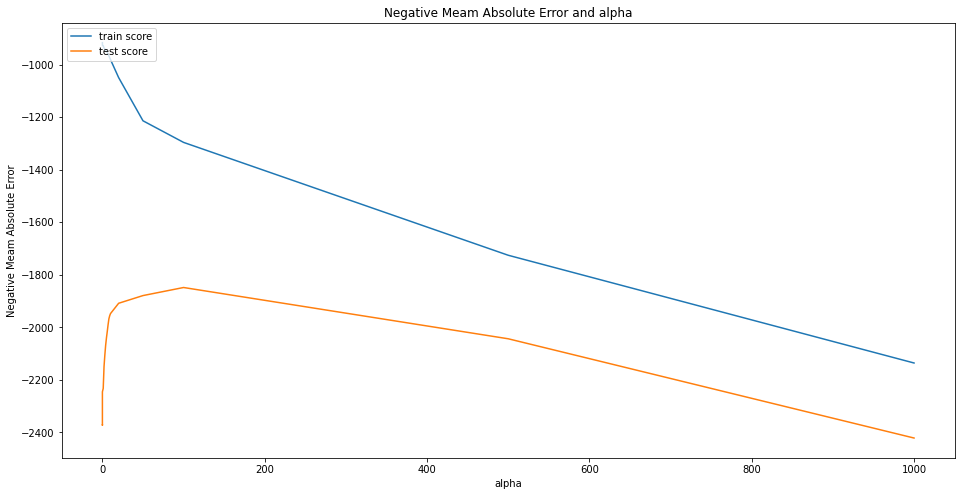

In [53]:
# changing param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

plt.show()

In [54]:
# Checking best  alpha from model_cv
grid_cv_model.best_params_

{'alpha': 100}

Observe that train and test scores start to become parallel to each other after apha crosses 100 

* So lets check our Lasso model on alpha 100

In [55]:
# Seting alpha =100
alpha =100

# Defining lasso with above alpha
lasso =Lasso(alpha=alpha)
  
# fiting lasso
lasso.fit(X_train,y_train)

Lasso(alpha=100)

In [56]:
# printing lasso coeficients
lasso.coef_

array([ -84.22520875,   56.421509  ,    0.        ,  900.28639249,
          0.        , 1736.63099513, 2193.93505254,   -0.        ,
       -369.24443981,  178.35435988, 1522.07964065,  135.30694641,
          0.        ,   -0.        ,   -0.        ,    0.        ,
          0.        , -111.48625164,   -0.        ,   -0.        ,
          0.        ,    0.        ,    0.        , -269.76735193,
          0.        , -431.4138248 ,   -0.        ,    0.        ,
       1135.99633323,    0.        ,   -0.        ,    0.        ,
         -0.        ,   -0.        ,  380.42944272,   -0.        ,
         -0.        ,   -0.        ,  233.39722306,   -0.        ,
         45.41147304,   -0.        ,    0.        ,    0.        ,
         -0.        ,    0.        ,  -69.83366348,   -0.        ,
        385.16157484, 1671.51809527, 1419.66936461,    0.        ,
         -0.        ,   -0.        ,    0.        ,  672.05459735,
          0.        ,  -36.92745329, -314.01352798, -104.56060

# ElasticNet Regression
**`Cross Validation and Hyperparameter Tuning`**

In [57]:
# Initialising ElasticNet()
elasticnet = ElasticNet() 

#using same attributes used for Ridge tuning except estimator here would be ElasticNet
grid_cv_model = GridSearchCV(estimator=elasticnet,
                       param_grid=params,
                       scoring='neg_mean_absolute_error',
                       cv=folds,
                       return_train_score=True,
                       verbose=1)
#fitingmodel_cv
grid_cv_model.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    1.3s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [58]:
# Saving model_cv results into a dataframe
cv_results = pd.DataFrame(grid_cv_model.cv_results_)

# cv_results head
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012291,0.000510,0.002441,0.000166,0.0001,{'alpha': 0.0001},-2257.138715,-2168.873475,-2004.039322,-2834.257233,...,-2358.228061,292.080396,19,-890.925327,-897.447526,-974.600134,-955.365169,-871.575949,-917.982821,39.775279
1,0.012706,0.001028,0.002517,0.000153,0.001,{'alpha': 0.001},-2159.418930,-2122.079508,-1811.274861,-2765.169419,...,-2250.595867,317.326868,17,-899.993101,-909.415311,-987.540658,-956.744816,-883.232606,-927.385299,38.738513
2,0.014053,0.001258,0.002374,0.000072,0.01,{'alpha': 0.01},-1832.495107,-2073.591806,-1546.776908,-2522.127438,...,-1976.080458,321.741582,13,-956.984542,-943.219516,-1056.261277,-978.269980,-934.464219,-973.839907,43.783705
3,0.006171,0.000240,0.002129,0.000084,0.05,{'alpha': 0.05},-1715.030493,-2161.537805,-1626.427921,-2389.491015,...,-1928.242746,295.280981,10,-1082.814146,-1022.630977,-1147.601029,-1042.868876,-1046.114597,-1068.405925,44.099549
4,0.005198,0.000200,0.002024,0.000021,0.1,{'alpha': 0.1},-1725.519391,-2169.243863,-1675.015730,-2311.932544,...,-1919.593495,266.489938,6,-1152.245614,-1076.136105,-1196.499381,-1098.104428,-1130.727556,-1130.742617,42.032020


**`plotting mean train and test scores with alpha`**

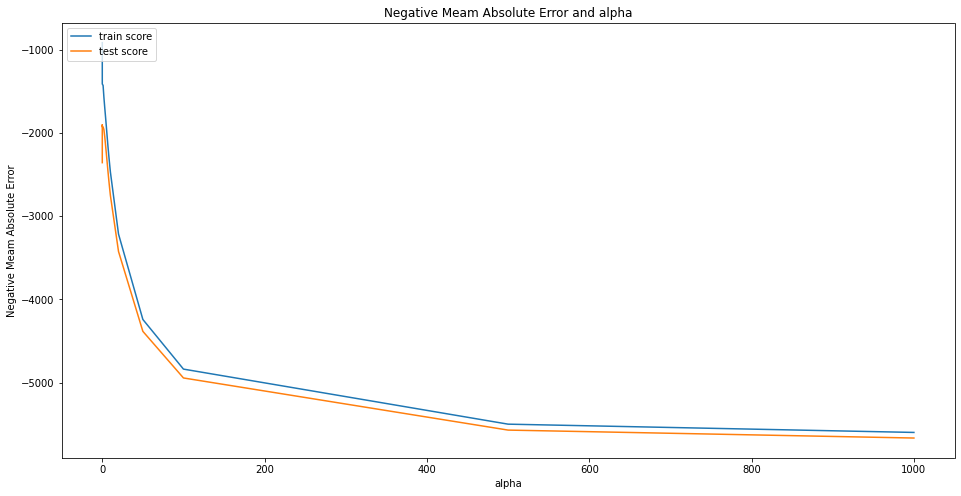

In [59]:
# change param_alpha datatype to float
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'],cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'],cv_results['mean_test_score'])

plt.title('Negative Meam Absolute Error and alpha')
plt.xlabel('alpha')
plt.ylabel('Negative Meam Absolute Error')
plt.legend(['train score','test score'],loc='upper left')

plt.show()

In [60]:
# Checking best  alpha from model_cv
grid_cv_model.best_params_

{'alpha': 0.3}

Observe that train and test scores start to become parallel to each other after apha crosses 0.3 
* So lets check our Elastic model on alpha 0.3

In [61]:
# Seting alpha=0.3
alpha =0.3

# Defining ElasticNet with above alpha
elasticnet = ElasticNet(alpha=alpha)
  
# fiting elastic net
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.3)

In [62]:
# printing ElasticNet coeficients
elasticnet.coef_

array([-569.01392496,  679.12195604,  296.65924844,  864.59180059,
         41.66589264, 1047.85107057, 1347.71205968,  104.95203923,
       -230.00848697,   57.11174306, 1049.73376256,  177.94350384,
       -191.24370519, -161.01131324, -103.6636834 ,  249.10472475,
        136.22732605, -284.38522234,   15.21399281, -170.174017  ,
        141.94256299,   88.83423882,  147.65240781, -339.40883239,
       -160.67524827, -507.15438345, -260.46764846,  174.64941326,
        822.45245631,   -2.91079817, -228.75329167,  175.88322618,
         69.05359315,  124.25900444,  102.71047538, -439.49329741,
       -610.96904079,    0.        ,  297.82240191,    0.        ,
        102.69892396,  -46.21950954,  -97.28588892,  170.18205537,
          0.        ,  282.35475209, -103.44692194,    0.        ,
        244.41498619, 1104.41774814, 1130.47752039,  -86.370595  ,
       -347.25874396, -322.20460595, -139.16163714,  611.00396969,
       -279.77560209, -201.61775939, -341.1290249 , -335.02199

# Model Evaluation
I am trying to compare all three model result using error term `RMSE` Root Mean Squared Error

In [63]:
# Calculating all 3 predictions 
pred_by_lasso =  lasso.predict(X_test)
pred_by_ridge = ridge.predict(X_test)
pred_by_elasticnet = elasticnet.predict(X_test)


# printing RMSE for all 3 techniques
print(f'Lasso RMSE: {np.sqrt(mse(y_test,pred_by_lasso))}')
print(f'Ridge RMSE: {np.sqrt(mse(y_test,pred_by_ridge))}')
print(f'ElasticNet RMSE: {np.sqrt(mse(y_test,pred_by_elasticnet))}')

Lasso RMSE: 2147.054965103895
Ridge RMSE: 2138.3923938552475
ElasticNet RMSE: 2148.8983411652325


Observe for our problem statement Ridge as a regularization technique giving best result 

**`NOTE`** <br>
`What I can do further is also I can check for other metrics, as to choose the best model`

For now I am going any further on this dataset, I will update it more in Future....Stay connected and keep learnig and by any chance if you love the work I have done please `UPVOTE`

# Generalised Regression using Polynomial Regression
For this I am thinking of taking a new dataset as it will help the learner to Explore more DataSet

Soon I will update new Notebook Link so stay connected

----
----

# other notebook links:
* [Simple Linear Regression](https://www.kaggle.com/mukeshmanral/linear-regression-basic)
* [Multiple Linear Regression](https://www.kaggle.com/mukeshmanral/multiple-linear-regression-basic)
* [Polynomial Regression](https://www.kaggle.com/mukeshmanral/polynomial-regression-basic)
* [Advanced Linear Regression](https://www.kaggle.com/mukeshmanral/advance-linear-regression-basic-gridsearchcv-hpt)






* [Feature Engineering 1](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-1-basic)
* [Feature Engineering 2](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-2-basic)
* [Feature Engineering 3](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-3-basic)
* [Feature Engineering 4](https://www.kaggle.com/mukeshmanral/feature-engineering-dataset-4-basic)

----
----